In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpli
import cv2
import os
%matplotlib inline

In [2]:
import keras


Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split



In [4]:
os.chdir('F:\Data')

In [216]:
def load_images_from_folder(folder):
    images = []
    y = []
    y1 = []
    n= -1
    for filename in os.listdir(folder):
        n = n+1
        for imagename in os.listdir(os.path.join(folder,filename)):
            
            
            img = cv2.imread(os.path.join(folder,filename,imagename))
            
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
            if img is not None:
                images.append(img)
                y.append(filename)
                y1.append(n)
    return images,y,y1

In [217]:
xtrain,ydict,ytrain = load_images_from_folder('Train')


In [228]:
len(np.unique(ydict))

46

In [229]:
np.shape(xtrain)

(78200, 32, 32)

In [221]:
a= np.unique(ydict)
b = list(range(0,46))
output = dict(zip(b,a))

In [240]:
w = pd.DataFrame(ytrain)
w[w[0]==0].count()


0    1700
dtype: int64

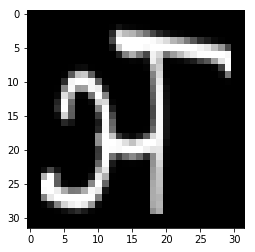

In [245]:
plt.imshow(xtrain[4],cmap='gray')

AttributeError: 'list' object has no attribute 'reshape'

In [247]:
op = []

for i in xtrain:
    i=i.flatten()
    op.append(i)    

xtrain = op


In [246]:
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size=0.05)

In [248]:
x = np.array(xtrain)
y=keras.utils.to_categorical(np.array(ytrain),46)

In [249]:
x=x/255.0

In [250]:
x_train=x.reshape(x.shape[0],32,32,1)

In [304]:
plt.imshow(xtest[80],cmap='gray')

TypeError: 'builtin_function_or_method' object is not subscriptable

In [130]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense,Flatten
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers import Dropout

In [252]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2,seed=100))
model.add(Dense(160,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [253]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [254]:
history=model.fit(x_train,y,epochs=20,batch_size=2000,validation_split=0.20)

Train on 59432 samples, validate on 14858 samples
Epoch 1/20
59432/59432 [==============================] - 52s 878us/step - loss: 3.8152 - acc: 0.0373 - val_loss: 3.7715 - val_acc: 0.0738
Epoch 2/20
59432/59432 [==============================] - 54s 902us/step - loss: 3.6851 - acc: 0.1017 - val_loss: 3.4101 - val_acc: 0.2055
Epoch 3/20
59432/59432 [==============================] - 59s 989us/step - loss: 2.7917 - acc: 0.2918 - val_loss: 1.8578 - val_acc: 0.5117
Epoch 4/20
59432/59432 [==============================] - 58s 969us/step - loss: 1.7110 - acc: 0.5282 - val_loss: 1.3354 - val_acc: 0.6396
Epoch 5/20
59432/59432 [==============================] - 57s 951us/step - loss: 1.3466 - acc: 0.6272 - val_loss: 1.1535 - val_acc: 0.6853
Epoch 6/20
59432/59432 [==============================] - 58s 979us/step - loss: 1.1708 - acc: 0.6763 - val_loss: 1.0107 - val_acc: 0.7239
Epoch 7/20
59432/59432 [==============================] - 57s 957us/step - loss: 1.0372 - acc: 0.7109 - val_loss: 0.

In [ ]:
a= -1
c=0
for i in xtest:
    a = a+1
    
    
    p=model.predict_proba(i.reshape(1,32,32,1))
    p = np.argmax(p)
    if p == ytest[a]:
        c = c+1
        
per = c/np.shape(xtest)[0]
per

In [263]:
x_test = pd.read_csv('Test_X.csv')


In [264]:
testx = np.array(x_test)

In [265]:
testx = testx/255.0

In [261]:
testx =testx.reshape(testx.shape[0],32,32,1)

In [266]:
testy = []
for i in testx:
    p = model.predict_proba(i.reshape(1,32,32,1))
    p = np.argmax(p)
    testy.append(p)
    

In [274]:
f=-1
yfinal = []
for i in testy:
    f=f+1
    yfi = output[testy[f]]
    yfinal.append(yfi)

In [278]:
test_y = pd.DataFrame(yfinal)

In [299]:
test_y = test_y.rename(columns={0:'Predictions'})

In [300]:
test_y.head()

,Predictions
0,character_11_taamatar
1,character_8_ja
2,digit_0
3,character_17_tha
4,character_3_ga


In [301]:
test_y.to_csv('pred.csv',index=False)

In [305]:
np.shape(testx)

(13800, 1024)

In [309]:
type(testx)

numpy.ndarray

In [308]:
xsh = testx.reshape(testx.shape[0],32,32)

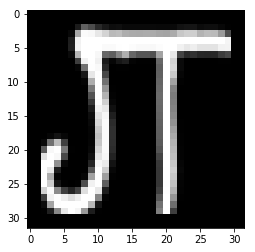

In [312]:
plt.imshow(xsh[4],cmap='gray')